# <font color='blue'>Sentiment Analysis of Agoda App Review on Google Play Store

## Content

- [Brief Introduction](#Brief-Introduction)
- [Imports](#Imports)
- [Obtaining Agoda App Review on Google Play Store](#Obtaining-Agoda-App-Review-on-Google-Play-Store)
- [Data import, inspection and cleaning](#Data-import,-inspection-and-cleaning)
- [Sentiment Analysis](#Sentiment-Analysis)
- [Word Cloud Visualisation](#Word-Cloud-Visualisation)

## Brief Introduction

Agoda is one of the most popular hotel booking platforms in the market. Therefore, it would be interesting to analyse the sentiments of the reviews on Google Play Store. 

## Imports

In [28]:
from google_play_scraper import app, Sort, reviews_all

import pandas as pd
import numpy as np

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

## Obtaining Agoda App Review on Google Play Store

In [2]:
# Obtain reviews from Google Play Store
review = reviews_all(
    'com.agoda.mobile.consumer',
    sleep_milliseconds=0, 
    lang='en', 
    country='us', 
    sort=Sort.MOST_RELEVANT)

After obtaining the reviews from Google Play Store, the information will be converted to a dataframe and inspected.

In [3]:
# Convert to dataframe
df = pd.DataFrame(review)

# Inspect dataframe
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,52f4e610-b018-4928-85f9-2d8ca3f122a2,Jill Riepe,https://play-lh.googleusercontent.com/a/ACg8oc...,I have tried to make a booking three times. Cu...,1,262,11.34.0,2023-09-11 17:05:45,Our apologies for the inconvenience caused. Pl...,2023-09-07 09:06:46,11.34.0
1,36895504-0e1e-495c-8aab-f7b2e7f6e283,nitish sapra,https://play-lh.googleusercontent.com/a-/ALV-U...,Unreliable bookings. I booked a hotel one mont...,1,9,11.39.1,2023-10-16 01:49:33,"Hi nitish sapra, Our apologies for the inconve...",2023-10-16 09:34:03,11.39.1
2,55d9345c-94c4-419f-8254-5ba2c815f69a,Wan Khim Fung,https://play-lh.googleusercontent.com/a-/ALV-U...,The sistem is very confusing. I need to perfor...,1,69,11.38.1,2023-09-29 20:43:42,We're sorry for the inconvenience caused. Plea...,2023-09-29 20:58:48,11.38.1
3,be8a31e0-cb39-4173-aa70-4846770f50c4,Dr. Harshad Ramineni,https://play-lh.googleusercontent.com/a-/ALV-U...,"Agoda, where do I start? It's like a crash par...",1,52,11.38.1,2023-09-30 11:22:42,We're sorry for the inconvenience caused. Plea...,2023-09-30 11:28:57,11.38.1
4,65f77aba-c82f-4247-86fb-d1df54026930,Corey Romig,https://play-lh.googleusercontent.com/a/ACg8oc...,Beware!! Use this app at your own risk. Booked...,1,5,11.39.1,2023-10-12 10:09:30,"Hi Corey Romig, Our apologies for the inconven...",2023-10-12 13:59:41,11.39.1


From the table above, the following columns will be removed as they are deem unnecessary.
<ul>
    <li>reviewId</li>
    <li>userImage</li>
    <li>score</li>
    <li>thumbsUpCount</li>
    <li>reviewCreatedVersion</li>
</ul>

In [4]:
# Drop unnecessary columns
df.drop(columns=['reviewId','userImage','score','thumbsUpCount','reviewCreatedVersion'],inplace=True)

In [5]:
# Inspect dataframe
df.head()

,userName,content,at,replyContent,repliedAt,appVersion
0,Jill Riepe,I have tried to make a booking three times. Cu...,2023-09-11 17:05:45,Our apologies for the inconvenience caused. Pl...,2023-09-07 09:06:46,11.34.0
1,nitish sapra,Unreliable bookings. I booked a hotel one mont...,2023-10-16 01:49:33,"Hi nitish sapra, Our apologies for the inconve...",2023-10-16 09:34:03,11.39.1
2,Wan Khim Fung,The sistem is very confusing. I need to perfor...,2023-09-29 20:43:42,We're sorry for the inconvenience caused. Plea...,2023-09-29 20:58:48,11.38.1
3,Dr. Harshad Ramineni,"Agoda, where do I start? It's like a crash par...",2023-09-30 11:22:42,We're sorry for the inconvenience caused. Plea...,2023-09-30 11:28:57,11.38.1
4,Corey Romig,Beware!! Use this app at your own risk. Booked...,2023-10-12 10:09:30,"Hi Corey Romig, Our apologies for the inconven...",2023-10-12 13:59:41,11.39.1


To make the columns more reader-friendly, the following columns will be renamed.
<ul>
    <li>userName -> user_name</li>
    <li>content -> review</li>
    <li>at -> date_posted</li>
    <li>replyContent -> agoda_reply</li>
    <li>repliedAt -> date_replied</li>
    <li>appVersion -> app_version</li>
</ul>

In [7]:
# Rename dataframe
df.rename(columns={'userName':'user_name','content':'review','at':'date_posted',
                   'replyContent':'agoda_reply','repliedAt':'date_replied','appVersion':'app_version'}, inplace=True)
# Check dataframe
df.head()

,user_name,review,date_posted,agoda_reply,date_replied,app_version
0,Jill Riepe,I have tried to make a booking three times. Cu...,2023-09-11 17:05:45,Our apologies for the inconvenience caused. Pl...,2023-09-07 09:06:46,11.34.0
1,nitish sapra,Unreliable bookings. I booked a hotel one mont...,2023-10-16 01:49:33,"Hi nitish sapra, Our apologies for the inconve...",2023-10-16 09:34:03,11.39.1
2,Wan Khim Fung,The sistem is very confusing. I need to perfor...,2023-09-29 20:43:42,We're sorry for the inconvenience caused. Plea...,2023-09-29 20:58:48,11.38.1
3,Dr. Harshad Ramineni,"Agoda, where do I start? It's like a crash par...",2023-09-30 11:22:42,We're sorry for the inconvenience caused. Plea...,2023-09-30 11:28:57,11.38.1
4,Corey Romig,Beware!! Use this app at your own risk. Booked...,2023-10-12 10:09:30,"Hi Corey Romig, Our apologies for the inconven...",2023-10-12 13:59:41,11.39.1


In [8]:
# Export and save dataframe
df.to_csv(r'C:\Users\cleme\Documents\Data Science Projects\Agoda App Reviews\Data\Agoda_App_Reviews.csv', index=False)

## Data import, inspection and cleaning

In [2]:
# Import data from saved file
df = pd.read_csv('./Data/Agoda_App_Reviews.csv')

In [3]:
# View dataset
df.head()

,user_name,review,date_posted,agoda_reply,date_replied,app_version
0,Jill Riepe,I have tried to make a booking three times. Cu...,2023-09-11 17:05:45,Our apologies for the inconvenience caused. Pl...,2023-09-07 09:06:46,11.34.0
1,nitish sapra,Unreliable bookings. I booked a hotel one mont...,2023-10-16 01:49:33,"Hi nitish sapra, Our apologies for the inconve...",2023-10-16 09:34:03,11.39.1
2,Wan Khim Fung,The sistem is very confusing. I need to perfor...,2023-09-29 20:43:42,We're sorry for the inconvenience caused. Plea...,2023-09-29 20:58:48,11.38.1
3,Dr. Harshad Ramineni,"Agoda, where do I start? It's like a crash par...",2023-09-30 11:22:42,We're sorry for the inconvenience caused. Plea...,2023-09-30 11:28:57,11.38.1
4,Corey Romig,Beware!! Use this app at your own risk. Booked...,2023-10-12 10:09:30,"Hi Corey Romig, Our apologies for the inconven...",2023-10-12 13:59:41,11.39.1


In [4]:
# Check for null vales
df.isnull().sum()

user_name           0
review            118
date_posted         0
agoda_reply     71238
date_replied    71238
app_version      9656
dtype: int64

After checking for null values, we can see that there are 118 empty reviews. These empty reviews will be removed.

In [5]:
# Remove null reviews from dataframe
df.dropna(subset=['review'],inplace=True)

# Check null reviews has been removed
df.isnull().sum()

user_name           0
review              0
date_posted         0
agoda_reply     71120
date_replied    71120
app_version      9649
dtype: int64

Next, duplicated entries will be identified and removed.

In [6]:
# Check for duplicates
df.duplicated().sum()

414

In [7]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)
# Check duplicated rows has been removed
df.duplicated().sum()

0

## Sentiment Analysis

To start off the sentiment analysis, the following will be done.
<ul>
    <li>Instantiate the Tokenizer with RegEx to remove special characters</li>
    <li>Instantiate the Lemmatizer</li>
    <li>Lower case all letters for standardisation</li>
</ul>

In [8]:
# Instantiate Tokenizer and remove special characters
tokenizer = RegexpTokenizer(r'\w+')
# Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Lower case all letters in review
df['review'] = df['review'].apply(lambda x: x.lower())

Next, the following will be done.
<ul>
    <li>Obtain English words from NLTK</li>
    <li>Define a function to tokenize all the words and remove non-English words</li>
    <li>Define a function to lemmatize the words</li>
    <li>Apply the functions to the 'review' column</li>
</ul>

In [10]:
# Get a set of English words from NLTK
english_words = set(words.words())

# Define a function to remove non-English words
def remove_non_english(text):
    words = tokenizer.tokenize(text)
    english_words_only = [word for word in words if word in english_words]
    return ' '.join(english_words_only)

# Define a function to lemmatize words
def lemmatize_text(text):
    english_only = remove_non_english(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in english_only.split()]
    return ' '.join(lemmatized_words)

In [11]:
# Lemmatize text in 'review' column
df['cleaned_text'] = df['review'].apply(lemmatize_text)

To analyse the sentiments and assign it to a score, the following will be done.
<ul>
    <li>Instantiate the Sentiment Intensity Analyzer</li>
    <li>Define a function to apply the sentiment analyzer to the column 'cleaned_text'</li>
    <li>Extract the compound score after applying the function to the 'cleaned_text' column into a new column 'compound_score'</li>
    <li>Define a function to rate the compound scores and apply the function to a new column 'sentiment_rating'</li>
</ul>

In [12]:
# Instantiate the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [13]:
# Define a function to apply sentiment analysis to 'cleaned_text'
def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to the 'cleaned_text' column and save it to 'sentiment_scores'
df['sentiment_scores'] = df['cleaned_text'].apply(analyze_sentiment)

In [14]:
# Define a function to extract compund scores from 'sentiment_scores'
def extract_compound(dictionary,key):
    if key in dictionary:
        return dictionary[key]

In [15]:
# Apply function to extract compund scores from 'sentiment_scores'
df['compound_score'] = df['sentiment_scores'].apply(lambda x: extract_compound(x,'compound'))

In [16]:
# Define a function to rate the 'compound_score'
def sentiment_rating(compound_score):
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [17]:
# Apply function to rate compund scores from 'compound_score'
df['sentiment_rating'] = df['compound_score'].apply(lambda x: sentiment_rating(x))

In [18]:
# Inspect dataset
df.head()

,user_name,review,date_posted,agoda_reply,date_replied,app_version,cleaned_text,sentiment_scores,compound_score,sentiment_rating
0,Jill Riepe,i have tried to make a booking three times. cu...,2023-09-11 17:05:45,Our apologies for the inconvenience caused. Pl...,2023-09-07 09:06:46,11.34.0,i have tried to make a booking three time cust...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.8427,positive
1,nitish sapra,unreliable bookings. i booked a hotel one mont...,2023-10-16 01:49:33,"Hi nitish sapra, Our apologies for the inconve...",2023-10-16 09:34:03,11.39.1,unreliable i booked a hotel one month before s...,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp...",-0.5267,negative
2,Wan Khim Fung,the sistem is very confusing. i need to perfor...,2023-09-29 20:43:42,We're sorry for the inconvenience caused. Plea...,2023-09-29 20:58:48,11.38.1,the is very i need to perform many unnecessary...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,Dr. Harshad Ramineni,"agoda, where do i start? it's like a crash par...",2023-09-30 11:22:42,We're sorry for the inconvenience caused. Plea...,2023-09-30 11:28:57,11.38.1,where do i start it s like a crash party in th...,"{'neg': 0.137, 'neu': 0.707, 'pos': 0.156, 'co...",-0.0258,neutral
4,Corey Romig,beware!! use this app at your own risk. booked...,2023-10-12 10:09:30,"Hi Corey Romig, Our apologies for the inconven...",2023-10-12 13:59:41,11.39.1,beware use this at your own risk booked a hote...,"{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'comp...",-0.2732,negative


In [19]:
df['sentiment_rating'].value_counts(normalize=True)

positive    0.708152
neutral     0.187062
negative    0.104787
Name: sentiment_rating, dtype: float64

Based on the sentiment analysis rating, majority of the reviews about Agoda's app is positive (71%).

## Word Cloud Visualisation

The stop words will be removed for the word cloud visualisation. Word clouds for both positive and negative reviews will be generated. This will be done in the following steps.
<ul>
    <li>Obtain list of stop words</li>
    <li>Define a function to remove stop words</li>
    <li>Apply function to remove stop words</li>
    <li>Filter the dataset into positive and negative reviews</li>
    <li>Generate word cloud for positive and negative reviews</li>
</ul>

In [20]:
# Obtain list of stop words
stop_words = set(stopwords.words('english'))

In [21]:
# Define a function to remove stop words words
def remove_stop_words(text):
    words = text.split()
    stop_words_removed = [word for word in words if word not in stop_words]
    return ' '.join(stop_words_removed)

In [22]:
# Apply function to remove stop words
df['stop_words_removed'] = df['cleaned_text'].apply(remove_stop_words)

In [23]:
# Filter positive reviews
positive = df.loc[df['sentiment_rating']=='positive']

# Filter negative reviews
negative = df.loc[df['sentiment_rating']=='negative']

### Positive Review Word Cloud

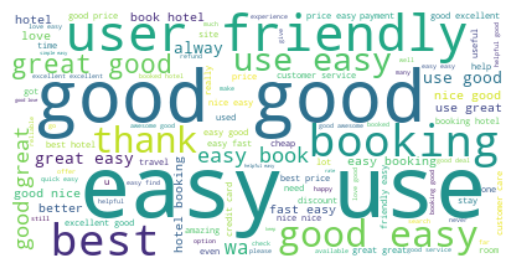

In [26]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(" ".join(positive['stop_words_removed']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative Review Word Cloud

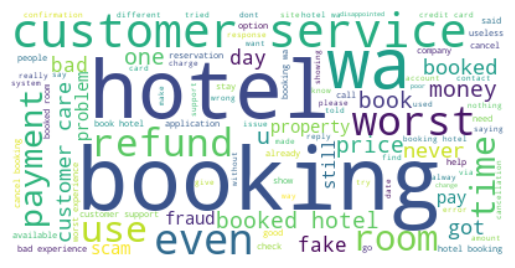

In [27]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(" ".join(negative['stop_words_removed']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()